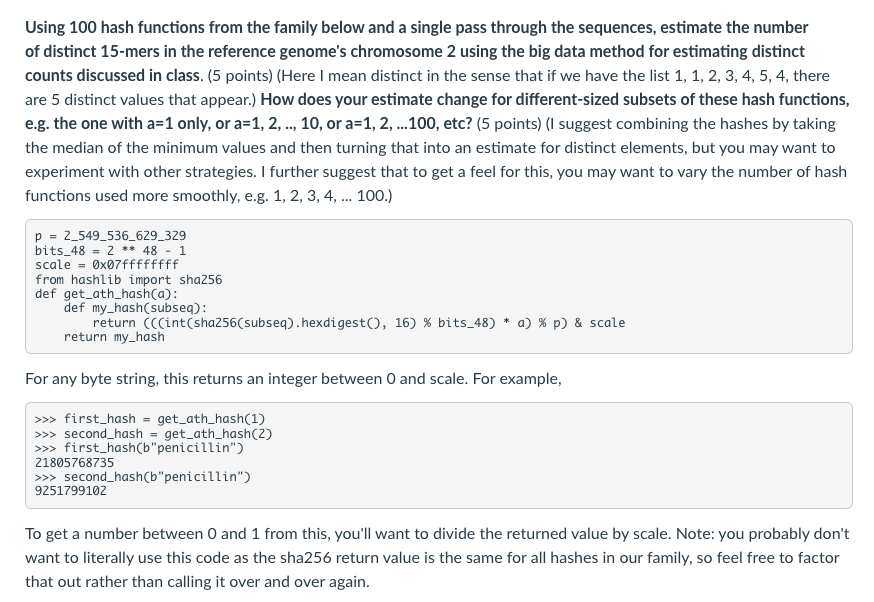

In [4]:
from Bio import SeqIO
human_genome = SeqIO.parse("GCA_000001405.28_GRCh38.p13_genomic.fna", "fasta")

In [5]:
for chromosome in human_genome:
    if chromosome.name == "CM000664.2":
        sequence = str(chromosome.seq).lower().encode('utf8')
        for i in range(len(sequence) - 15):
            mers_15 = sequence[i : i + 15]
  

In [14]:
for chromosome in human_genome:
    if chromosome.name == "CM000664.2":
        sequence = str(chromosome.seq).lower()
        # DO STUFF HERE
        count = 0
        for i in range(len(sequence) - 15):
            subseq = sequence[i : i + 15]
            count_inseq = subseq.count("n") 
            if count_inseq <= 2:
                count += 1
        print(count)
        
        

240548031


In [5]:
p = 2_549_536_629_329
bits_48 = 2 ** 48 - 1
scale = 0x07ffffffff
from hashlib import sha256
def get_ath_hash(a):
    def my_hash(subseq):
        return (((int(sha256(subseq).hexdigest(), 16) % bits_48) * a) % p) & scale
    return my_hash

In [6]:
hash_funcs = []
for i in range(1, 101):
    hash_funcs.append(get_ath_hash(i))

In [3]:
import time

In [ ]:
import numpy as np
min_hashes = []
for k in range(100):
    hash_func = hash_funcs[k]
    min_hash = float('inf')
    for subseq in mers_list:
        temp = hash_func(subseq)
        min_hash = min(min_hash, temp)
    min_hashes.append(min_hash)
    if k%5 ==0:
        print(f'---{k}th hash func---'+time.asctime()+':',min_hash)
num = int(scale/np.median(min_hashes) -1)


---0th hash func---Tue Oct  5 15:50:52 2021: 520
---5th hash func---Tue Oct  5 16:31:33 2021: 318
---10th hash func---Tue Oct  5 17:12:01 2021: 913
---15th hash func---Tue Oct  5 17:52:01 2021: 126
---20th hash func---Tue Oct  5 18:32:55 2021: 94
---25th hash func---Tue Oct  5 19:14:07 2021: 82
---30th hash func---Tue Oct  5 19:55:07 2021: 893
---35th hash func---Tue Oct  5 20:36:09 2021: 237
---40th hash func---Tue Oct  5 21:17:27 2021: 65
---45th hash func---Tue Oct  5 21:58:34 2021: 297
---50th hash func---Tue Oct  5 22:39:48 2021: 110
---55th hash func---Tue Oct  5 23:21:00 2021: 245
---60th hash func---Wed Oct  6 00:02:05 2021: 315
---65th hash func---Wed Oct  6 00:43:08 2021: 593
---70th hash func---Wed Oct  6 01:24:18 2021: 507
---75th hash func---Wed Oct  6 02:05:45 2021: 453
---80th hash func---Wed Oct  6 02:48:49 2021: 241
---85th hash func---Wed Oct  6 03:31:54 2021: 168


In [10]:
print(f'Number of estimated distinct mers is {num}')

Number of estimated distinct mers is 201523391


In [8]:
res1 = int(scale / min_hashes[0] - 1)
res10 = int(scale / np.median(min_hashes[:10]) - 1)
print(res1)
print(res10)

66076418
138827224


In [7]:
import random
import numpy as np

def str_generator(n):
    s = []
    for i in range(n):
        s.append(''.join(random.sample(['z','y','x','w','v','u','t','s','r','q','p','o','n','m','l','k','j','i','h','g','f','e','d','c','b','a'], 20)).encode('utf8'))
    return s
my_mers_list = str_generator(10)*100000
print("Number of total mers :", len(my_mers_list))
print("Number of unique mers :", len(set(my_mers_list)))

my_min_hashes = []
for k in range(100):
    my_hash_func = hash_funcs[k]
    my_min_hash = float('inf')
    for subseq in my_mers_list:
        temp = my_hash_func(subseq)
        my_min_hash = min(my_min_hash, temp)
    my_min_hashes.append(my_min_hash)
num = scale/np.median(my_min_hashes) - 1
print("Number of estimated unique mers :", num) 

Number of total mers : 1000000
Number of unique mers : 10
Number of estimated unique mers : 11.798358161891802
